In [4]:
import os.path
from os.path import isfile, join
import time
from time import sleep
from os import listdir
import numpy as np
import pandas as pd
import geopandas
import sklearn
from sklearn import svm
import pickle

import datatable as dt

#E1_data_path = "/home/rupa/E1/"
# slim_ancestry_labels = "/home/alex_o/s3-drive/alexo/slim_old/truth_gai_testset.txt"
# okg_labels = '/home/alex_o/s3-drive/alexo/igsr-1000 genomes 30x on grch38 23Levels.csv'

# E1_dmers = [f for f in listdir(E1_data_path) if isfile(join(E1_data_path, f))]
#gets all the files that were generated in Alex's E1 dmers experiment


def ancient_name(row):
    return row.split(" ")[-1]


def sample_name(filename):
    return filename.split("_with_", 1)[1][:-6]


def dmer_start(filename):
    with open(join(E1_data_path, filename)) as f:
        for line in f:
            line = line.split(",")
            dmer_start = line[3]
            print(dmer_start)


def get_dmers(filename):
    f = open(join(E1_data_path, filename))
    for line in f:
        line = line.split(",")
        dmer_start = line[3]
        dmer_end = line[4]
        dmer_length = line[5]
        ancient_name = line[7]



    awk '!a[$0]++'  E1_dmersanalysis.txt > E1_dmers.txt

    for f in *; do awk '!a[$0]++'  "$f" ; done >  dmers.csv
    
    sed 's/\,/\t/g' dmers.csv > Dmers_cleaned.csv

#to remove any repeating lines

In [7]:
E1_all_df=dt.fread("~/Dmers_cleaned.csv", sep="\t", fill=True).to_pandas()


In [8]:
E1_df=pd.read_csv("~/Dmers_cleaned.csv", sep="\t", low_memory=False)

In [ ]:
E1_df_dmers=pd.read_csv("~/dmers.csv", sep="\t", low_memory=False)
E1_df_dmers.columns = ['chr', 'start', 'end', 'dmer_start', 'dmer_end', 'dmer len',
                       'match_ID', 'match_pop', 'ID', 'ID_pop']

In [ ]:
df = E1_df_dmers


In [ ]:
df

,chr,start,end,dmer_start,dmer_end,dmer len,match_ID,match_pop,ID,ID_pop,ancient_genome
0,20,106775.0,62890163.0,0.0,3835.0,3835.0,1.0,ZZZ Unknown sample AfontovaGora2.SG,0.0,ZZZ Unknown sample AfontovaGora2.SG,AfontovaGora2.SG
1,20,106775.0,62890163.0,0.0,3835.0,3835.0,0.0,ZZZ Unknown sample AfontovaGora2.SG,1.0,ZZZ Unknown sample AfontovaGora2.SG,AfontovaGora2.SG
2,20,106775.0,119864.0,0.0,1.0,1.0,0.0,ZZZ Unknown sample AfontovaGora2.SG,2.0,ZZZ Unknown sample HG00101,AfontovaGora2.SG
3,20,106775.0,120721.0,0.0,3.0,3.0,0.0,ZZZ Unknown sample AfontovaGora2.SG,2.0,ZZZ Unknown sample HG00101,AfontovaGora2.SG
4,20,106775.0,119864.0,0.0,1.0,1.0,0.0,ZZZ Unknown sample AfontovaGora2.SG,2.0,ZZZ Unknown sample HG00106,AfontovaGora2.SG
...,...,...,...,...,...,...,...,...,...,...,...
19379887,20,45965589.0,46073481.0,2555.0,2562.0,7.0,0.0,ZZZ Unknown sample yak025.SG,2.0,ZZZ Unknown sample i9_SAS_generation5,yak025.SG
19379888,20,106775.0,119864.0,0.0,1.0,1.0,0.0,ZZZ Unknown sample yak025.SG,2.0,ZZZ Unknown sample i9_SAS_generation6,yak025.SG
19379889,20,47851780.0,47855934.0,2699.0,2700.0,1.0,0.0,ZZZ Unknown sample yak025.SG,2.0,ZZZ Unknown sample i9_SAS_generation6,yak025.SG
19379890,20,60321657.0,60376370.0,3626.0,3629.0,3.0,0.0,ZZZ Unknown sample yak025.SG,2.0,ZZZ Unknown sample i9_SAS_generation6,yak025.SG


In [ ]:
ancient_names_indf=[f for f in df['match_pop']]

In [ ]:
ancient_names=[]
len_a = len(ancient_names_indf)
for i in range(1,len_a): 
    if type(ancient_names_indf[i]) == str:
        name = ancient_names_indf[i].split(" ")[-1]
        ancient_names.append(name)
    else:
        ancient_names.append("NA")
ancient_names.append('yak025.SG')
# for f in ancients:
#     if type(f) != str:
#         print(f)


In [ ]:
def get_ancient_name(row):
    if type(row)==str:
        name = row[i].split(" ")[3]


In [ ]:
df['ancient_genome']=ancient_names

In [ ]:
df.to_csv("~/dmers_dataframe.csv", sep="\t", index=False)

In [ ]:
df=pd.read_csv("~/dmers_dataframe.csv", sep="\t", low_memory=False)

In [ ]:
ancient_indiv=df['ancient_genome'].unique()
ancients={}
for f in ancient_indiv:
    dfname=f
    ancients[dfname]=df[df['ancient_genome']==f]

In [ ]:
ancient_indiv = df['ancient_genome'].unique()
ancients={}
for dfname in ancient_indiv:
    ancients[dfname]=df[df['ancient_genome']==dfname]

In [ ]:
ancients['GoyetQ53-1_published_d']
def get_sample(row):
    if type(row)==str:
        names=row.split(" ")
        if len(names)>1:
            return names[4]


In [ ]:
import pickle

with open('ancients.pickle', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(ancients, f, pickle.HIGHEST_PROTOCOL)



Use the following to reload the ancients into python

In [ ]:
with open('ancients.pickle', 'rb') as f:
    # The protocol version used is detected automatically, so we do not
    # have to specify it.
    ancients_df_pickle = pickle.load(f)


In [ ]:
for dfname in ancient_indiv:
   datafr = ancients[dfname]
   datafr['sample_name']=datafr['ID_pop'].apply(get_sample)

/tmp/ipykernel_2562144/1237471200.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datafr['sample_name']=datafr['ID_pop'].apply(get_sample)


In [ ]:
ancients['AfontovaGora2.SG']


,chr,start,end,dmer_start,dmer_end,dmer len,match_ID,match_pop,ID,ID_pop,ancient_genome,sample_name
0,20,106775.0,62890163.0,0.0,3835.0,3835.0,1.0,ZZZ Unknown sample AfontovaGora2.SG,0.0,ZZZ Unknown sample AfontovaGora2.SG,AfontovaGora2.SG,AfontovaGora2.SG
1,20,106775.0,62890163.0,0.0,3835.0,3835.0,0.0,ZZZ Unknown sample AfontovaGora2.SG,1.0,ZZZ Unknown sample AfontovaGora2.SG,AfontovaGora2.SG,AfontovaGora2.SG
2,20,106775.0,119864.0,0.0,1.0,1.0,0.0,ZZZ Unknown sample AfontovaGora2.SG,2.0,ZZZ Unknown sample HG00101,AfontovaGora2.SG,HG00101
3,20,106775.0,120721.0,0.0,3.0,3.0,0.0,ZZZ Unknown sample AfontovaGora2.SG,2.0,ZZZ Unknown sample HG00101,AfontovaGora2.SG,HG00101
4,20,106775.0,119864.0,0.0,1.0,1.0,0.0,ZZZ Unknown sample AfontovaGora2.SG,2.0,ZZZ Unknown sample HG00106,AfontovaGora2.SG,HG00106
...,...,...,...,...,...,...,...,...,...,...,...,...
5269,20,106775.0,119864.0,0.0,1.0,1.0,0.0,ZZZ Unknown sample AfontovaGora2.SG,2.0,ZZZ Unknown sample i9_SAS_generation3,AfontovaGora2.SG,i9_SAS_generation3
5270,20,106775.0,119864.0,0.0,1.0,1.0,0.0,ZZZ Unknown sample AfontovaGora2.SG,2.0,ZZZ Unknown sample i9_SAS_generation4,AfontovaGora2.SG,i9_SAS_generation4
5271,20,106775.0,120721.0,0.0,3.0,3.0,0.0,ZZZ Unknown sample AfontovaGora2.SG,2.0,ZZZ Unknown sample i9_SAS_generation5,AfontovaGora2.SG,i9_SAS_generation5
5272,20,23044658.0,23046776.0,1713.0,1714.0,1.0,0.0,ZZZ Unknown sample AfontovaGora2.SG,2.0,ZZZ Unknown sample i9_SAS_generation5,AfontovaGora2.SG,i9_SAS_generation5


In [ ]:
#same as above, but for E3:
E3_data_path = "/mnt/efs/data/users/alexo/E3/Frankengenomes/ef/test_dmers/"

E3_dmers = [f for f in listdir(E3_data_path) if isfile(join(E3_data_path, f))]


#remove repeats and concatenate

    cd /mnt/efs/data/users/alexo/E3/Frankengenomes/ef/test_dmers/
    for f in *; do awk '!a[$0]++'  "$f" ; done >  E3_dmers.csv
    #then use this to make the massive dataframe and dictionary of dataframes


#then remove repeats in the new file

    awk '!a[$0]++'  E3_dmers.csv; done >  E3_concat_dmers.csv
    
#then add tabs in place of commas as delimiters

    sed 's/\,/\t/g' E3_concat_dmers.csv > E3_cleaned_dmers.csv

#grab first and last chr20 positions for Alex

    cat /home/alex_o/s3-drive/alexo/CHROM_POS.txt | awk -F$'\t' '{ 
        if (NR>1){
            if (i==1) {
                if ($i=="chr20"){print$2}};
        }
    }'

In [ ]:
E3_df=pd.read_csv("~/E3_cleaned_dmers.csv", sep="\t", low_memory=False)

In [ ]:
df_GoyetQ53.to_csv("~/E1_GoyetQ53.csv", sep="\t", index=False)

In [ ]:
ancients

{'AfontovaGora2.SG':      chr  dmer_start  dmer_end  dmer len  \
 0     20         0.0    3835.0    3835.0   
 1     20         0.0    3835.0    3835.0   
 2     20         0.0       1.0       1.0   
 3     20         0.0       3.0       3.0   
 4     20         0.0       1.0       1.0   
 ...   ..         ...       ...       ...   
 5269  20         0.0       1.0       1.0   
 5270  20         0.0       1.0       1.0   
 5271  20         0.0       3.0       3.0   
 5272  20      1713.0    1714.0       1.0   
 5273  20         0.0       1.0       1.0   
 
                                  match_pop    ancient_genome  
 0      ZZZ Unknown sample AfontovaGora2.SG  AfontovaGora2.SG  
 1      ZZZ Unknown sample AfontovaGora2.SG  AfontovaGora2.SG  
 2      ZZZ Unknown sample AfontovaGora2.SG  AfontovaGora2.SG  
 3      ZZZ Unknown sample AfontovaGora2.SG  AfontovaGora2.SG  
 4      ZZZ Unknown sample AfontovaGora2.SG  AfontovaGora2.SG  
 ...                                    ...           

<AxesSubplot:xlabel='dmer_start', ylabel='dmer len'>

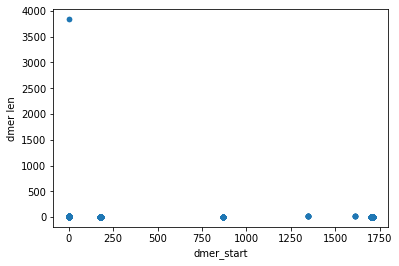

In [ ]:
ancients['AfontovaGora2.SG'].plot.scatter('dmer_start', 'dmer len')


In [ ]:
df.plot('dmer_end', 'dmer len')

NameError: name 'df' is not defined

In [ ]:
import seaborn as sns
import pandas as pd

